<a href="https://colab.research.google.com/github/A-R-I-N-D-A-M/Natural-language-processing/blob/main/Bengali_news_article_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import json
import os
import re
import string
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [63]:
def extract_text(filename, field):
    
    extracted_field=[]
    
    with open(os.path.join(filename), 'r') as f:
        articles=json.load(f)
    
    for article in articles['articles']:
        extracted_field.append(article[field].strip())
    
    return extracted_field

def replace_strings(texts, replace):
    new_texts=[]
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    
    for text in texts:
        for r in replace:
            text=text.replace(r[0], r[1])
        text=emoji_pattern.sub(r'', text)
        text=english_pattern.sub(r'', text)
        text=re.sub(r'\s+', ' ', text).strip()
        new_texts.append(text)

    return new_texts

def remove_punc(sentences):
    # import ipdb; ipdb.set_trace()
    new_sentences=[]
    exclude = list(set(string.punctuation))
    exclude.extend(["’", "‘", "—"])
    for sentence in sentences:
        s = ''.join(ch for ch in sentence if ch not in exclude)
        new_sentences.append(s)
    
    return new_sentences

replace=[('\u200c', ' '),
         ('\u200d', ' '),
        ('\xa0', ' '),
        ('\n', ' '),
        ('\r', ' ')]

In [71]:
ABP_body=extract_text('/content/drive/MyDrive/Dataset/News Articles/anandabazar_articles.txt', 'body')
ABP_body=remove_punc(ABP_body)
ABP_body=replace_strings(ABP_body, replace)

In [ ]:
ABP_body[:5]

['জঙ্গি হটাতে যুদ্ধের ডাক দিয়েছিলেন আগেই। এ বার পশ্চিম এশিয়ায় শান্তি স্থাপনের জন্য যত দূর সম্ভব চেষ্টা করবেন বলে আশ্বাস দিলেন মার্কিন প্রেসিডেন্ট ডোনাল্ড ট্রাম্প। গত তিন বছরে একটি বারের জন্যও এক টেবিলে বসেনি ইজরায়েলপ্যালেস্তাইন। সন্ধি নিয়ে একটাও কথা হয়নি যুযুধান দুই দেশে। ট্রাম্প তবু শান্তি ফেরাতেই জেরুজালেম থেকে আজ সরাসরি পা রাখলেন বেথলেহেমে। বিষয়টা যে কঠিন তা মেনে নিয়েই। গত কাল এ নিয়ে ইজরায়েলি প্রধানমন্ত্রী বেঞ্জামিন নেতানিয়াহুর সঙ্গে এক প্রস্ত কথা হয় তাঁর। নেতানিয়াহুর তরফে সাড়া মিলতেই উৎসাহী ট্রাম্প আজ পৌঁছে যান ইজরায়েল অধিকৃত ওয়েস্ট ব্যাঙ্কে। গাড়িতে পাক্কা কুড়ি মিনিটের রাস্তা। মাঝখানে পেরিয়ে আসেন দুদেশের মাঝের বহু বিতর্কিত বিচ্ছেদের দেওয়াল। মার্কিন প্রেসিডেন্টের এই সফর ঘিরে প্যালেস্তাইনিদের একাংশ বিক্ষোভ শুরু করেছেন গাজা আর ওয়েস্ট ব্যাঙ্কে। তবু বেথলেহেমে ট্রাম্পের গাড়ি ঢুকতেই চোখে পড়ল পোস্টার শান্তির দূতকে স্বাগত জানাচ্ছে শান্তির শহর। তা হলে কি প্যালেস্তাইনও রাজি সরাসরি কেউ মুখ না খুললেও তেমনটাই মনে করছেন কূটনীতিকরা। সাংবাদিকদের প্রশ্নের উত্তরে ট্রাম্পের সফরসঙ্গী মার্কিন বিদেশ

In [72]:
ebala_body=extract_text('/content/drive/MyDrive/Dataset/News Articles/ebala_articles.txt', 'body')
ebala_body=remove_punc(ebala_body)
ebala_body=replace_strings(ebala_body, replace)

In [73]:
zee_body=extract_text('/content/drive/MyDrive/Dataset/News Articles/zeenews_articles.txt', 'body')
zee_body=remove_punc(zee_body)
zee_body=replace_strings(zee_body, replace)

In [80]:
body=[]
body.extend(zee_body)
body.extend(ABP_body)
body.extend(ebala_body)
print('Total length of training data :',len(body))

Total length of training data : 14205


In [81]:
body=[article.split('।') for article in body]
body=[item for sublist in body for item in sublist]#
body=[item.strip() for item in body if len(item.split())>2]

#body=[item.split() for item in body]

print(body[:10])

['যা আমাদের ত্যাগের দিকে তপস্যার দিকে নিয়ে যায় তাকেই বলি মনুষ্যত্ব মানুষের ধর্ম', 'এইরকমই এক ধর্মের কথা ভেবেছিলেন রবীন্দ্রনাথ', 'কিন্তু কী ত্যাগ কিসেরই বা তপস্যা রবীন্দ্রনাথ তাকে বলছেন যেখানে আমিকে নাআমির দিকে ছাড়তে বাধা পাই তাকে অহং বেড়ায় বিচ্ছিন্ন সীমাবদ্ধ করে দেখি', 'এক আত্মলোকে সকল আত্মর অভিমুখে আত্মার সত্য এই সত্যের আদর্শেই বিচার করতে হবে মানুষের সভ্যতা', 'মানুষের দায় মহামানবের দায় কোথাও তার সীমা নেই', 'রবীন্দ্রনাথ যাকে বলছেন মহামানবের দায় তা হল আমি থেকে নাআমিতে পৌঁছনো', 'আবরণময় আমিকে আবরণমুক্ত আত্মতে উত্তরণ', 'সেটাই তাঁর সাধনা', 'রবীন্দ্রনাথ যাকে বলেন হওয়া বা হয়ে ওঠা', 'এই হয়ে ওঠার সাধনাই রবীন্দ্রনাথের জীবনজুড়ে তাঁর সমগ্র রচনার ধারণশক্তি']


In [82]:
model=word2vec.Word2Vec(body, size=200, window=10, min_count=1)

In [ ]:
model.wv.similarity('বাঙালি', 'মিষ্টি')

0.699025

In [ ]:
model.wv.similarity('বিহারি', 'মিষ্টি')

0.5429312

In [ ]:
model.wv.save_word2vec_format('/content/drive/MyDrive/Dataset/News Articles/custom_glove_200d.txt')

In [2]:
def extract_text(filename, label, body):
    
    extracted_label=[]
    extracted_body=[]
    
    with open(os.path.join(filename), 'r') as f:
        articles=json.load(f)
    
    for article in articles['articles']:
        extracted_label.append(article[label].strip())
        extracted_body.append(article[body].strip())

    
    return extracted_label,extracted_body


In [3]:
ABP_label,ABP_body=extract_text('/content/drive/MyDrive/Dataset/News Articles/anandabazar_articles.txt','label','body')
ebala_label,ebala_body=extract_text('/content/drive/MyDrive/Dataset/News Articles/ebala_articles.txt','label','body')
zee_label,zee_body=extract_text('/content/drive/MyDrive/Dataset/News Articles/zeenews_articles.txt','label','body')

In [4]:
body=[]
body.extend(zee_body)
body.extend(ABP_body)
body.extend(ebala_body)

label=[]
label.extend(zee_label)
label.extend(ABP_label)
label.extend(ebala_label)

In [8]:
df=pd.DataFrame(columns=['label','body'])

In [9]:
df['label']=label
df['body']=body

In [10]:
df

,label,body
0,kolkata,"‘’যা আমাদের ত্যাগের দিকে, তপস্যার দিকে নিয়ে যা..."
1,kolkata,রবিবার সন্ধে ছটা নাগাদ বন্ধুবান্ধবদের সঙ্গে কফ...
2,kolkata,"ফের বদলি আমলা। উন্নয়নের কাজে বাধা দিচ্ছেন, এই ..."
3,kolkata,শোভন চট্টোপাধ্যায়ের ইস্তফার নেপথ্যে বৈশাখী বন্...
4,kolkata,বড়দিনেও এবার ব্রাত্য শীত। ঠান্ডা আছে ঠিকই। কি...
...,...,...
14200,sports,বিরাট কোহলির ভারতীয় দলের গুরুত্বপূর্ণ সদস্য তি...
14201,entertainment,‘বাজিরাও মস্তানি’ (২০১৪) ছবিতে দিওয়ানি গানটিতে...
14202,sports,১৭ জুন: রাশিয়া বিশ্বকাপের অন্যতম ফেভারিট মনে ক...
14203,sports,১. রোহিত শর্মা বনাম শাজিল খান- রোহিত এগিয়ে\n২....


In [54]:
df.groupby('label').size()

label
entertainment    1493
international     678
kolkata          5793
nation           1809
sport            1657
state            2775
dtype: int64

In [55]:
label=['entertainment','international','kolkata','nation','sport','state']

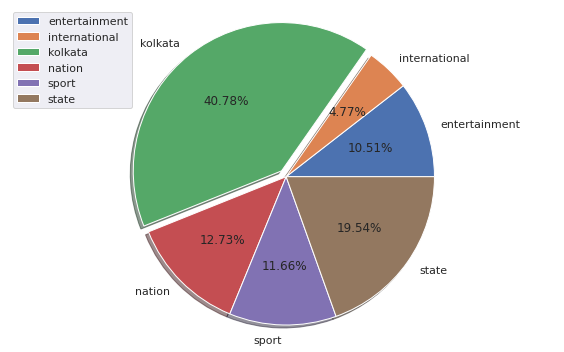

In [61]:
plt.figure(figsize=(8,5))
plt.pie(df.groupby('label').size(),labels=label,explode=(0,0,0.05,0,0,0),radius=1,autopct='%0.2f%%',shadow=True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

# Deep learning approch

In [67]:
cleaned_body=remove_punc(df.body)
cleaned_body=replace_strings(cleaned_body, replace)

In [11]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import RFE
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import tensorflow as tf

Using TensorFlow backend.


In [13]:
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 200
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~।', lower=False)
tokenizer.fit_on_texts(df.body.values)
word_index = tokenizer.word_index
vocab_size = len(word_index)
print('Found %s unique tokens.' % vocab_size)

Found 184472 unique tokens.


In [14]:
X = tokenizer.texts_to_sequences(df.body.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (14205, 250)


In [15]:
Y = pd.get_dummies(df.label).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (14205, 10)


In [16]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=0.20)

In [17]:
embeddings_index = {};
with open('/content/drive/MyDrive/Dataset/News Articles/custom_glove_200d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, EMBEDDING_DIM));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size+1, EMBEDDING_DIM, input_length=X.shape[1], weights=[embeddings_matrix]))
# experiment with combining different types, such as convolutions and LSTMs
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv1D(100, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 200)          36894600  
_________________________________________________________________
dropout (Dropout)            (None, 250, 200)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 246, 100)          100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 61, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_______________________________________________________

In [19]:
epochs = 50
batch_size = 16

history = model.fit(train_features, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)], verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10227 samples, validate on 1137 samples
Epoch 1/50
10227/10227 - 58s - loss: 1.0207 - acc: 0.6091 - val_loss: 0.6517 - val_acc: 0.7432
Epoch 2/50
10227/10227 - 50s - loss: 0.5381 - acc: 0.8075 - val_loss: 0.4655 - val_acc: 0.8320
Epoch 3/50
10227/10227 - 50s - loss: 0.3524 - acc: 0.8764 - val_loss: 0.4453 - val_acc: 0.8487
Epoch 4/50
10227/10227 - 50s - loss: 0.2347 - acc: 0.9220 - val_loss: 0.5057 - val_acc: 0.8329
Epoch 5/50
10227/10227 - 50s - loss: 0.1489 - acc: 0.9525 - val_loss: 0.4480 - val_acc: 0.8619
Epoch 6/50
10227/10227 - 50s - loss: 0.0945 - acc: 0.9722 - val_loss: 0.4964 - val_acc: 0.8575


In [49]:
accr = model.evaluate(test_features,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2841/2841 [==============================] - 2s 562us/sample - loss: 0.5110 - acc: 0.8493
Test set
  Loss: 0.511
  Accuracy: 0.849


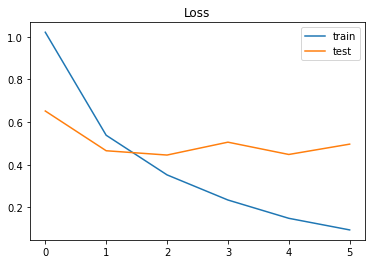

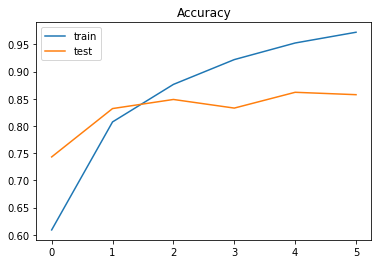

In [22]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

# Machine learning approach

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [33]:
df.groupby('label').size()

label
entertainment    1492
international     664
kolkata          5793
nation             15
national         1794
sport              20
sports           1637
state            2775
travel              1
world              14
dtype: int64

In [34]:
df.label=df.label.replace({'national':'nation','sports':'sport','world':'international','travel':'entertainment'})

In [43]:
x_train,x_test,y_train,y_test=train_test_split(df.body,df.label)

In [39]:
text_cl_nv=Pipeline([('tfidf',TfidfVectorizer(max_df=0.95)),('clf',MultinomialNB())])
text_cl_svm=Pipeline([('tfidf',TfidfVectorizer(max_df=0.95)),('clf',LinearSVC())])

In [44]:
text_cl_nv.fit(x_train,y_train)
text_cl_svm.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.95, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
              

In [45]:
pred_nb=text_cl_nv.predict(x_test)
pred_svm=text_cl_svm.predict(x_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print('accuracy of naive bayes model is :',classification_report(y_test,pred_nb))

accuracy of naive bayes model is :                precision    recall  f1-score   support

entertainment       0.89      0.14      0.24       365
international       0.00      0.00      0.00       180
      kolkata       0.41      1.00      0.58      1396
       nation       0.89      0.02      0.04       439
        sport       0.97      0.19      0.32       445
        state       0.80      0.01      0.01       727

     accuracy                           0.43      3552
    macro avg       0.66      0.23      0.20      3552
 weighted avg       0.65      0.43      0.30      3552



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print('accuracy of svm model is :',classification_report(y_test,pred_svm))

accuracy of svm model is :                precision    recall  f1-score   support

entertainment       0.81      0.85      0.83       365
international       0.61      0.42      0.50       180
      kolkata       0.85      0.93      0.89      1396
       nation       0.69      0.65      0.67       439
        sport       0.91      0.89      0.90       445
        state       0.79      0.74      0.76       727

     accuracy                           0.81      3552
    macro avg       0.78      0.74      0.76      3552
 weighted avg       0.81      0.81      0.81      3552

